   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

<ipython-input-1-217d765b65b3>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Survived'], kde=False, hist=True, bins=3)


0.8060606060606059
[[133  32]
 [ 32 133]]


<Axes: >

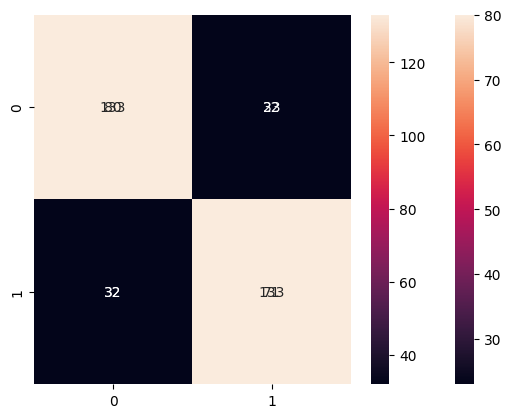

In [1]:
import pandas as pd
import imblearn as im
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

train_data = pd.read_csv('titanic_train.csv')
print(train_data.head()) 

print(train_data.shape)

print(train_data.columns.values)
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
print(train_data.dtypes)

print(train_data['Survived'].value_counts())

sns.distplot(train_data['Survived'], kde=False, hist=True, bins=3)

print(train_data.isnull().sum())

train_data['Age'] = train_data['Age'].fillna(30)

train_data = train_data.drop(columns=["Cabin"])

train_data[train_data.isnull().any(axis=1)]

gender, gender_uniques = pd.factorize(train_data['Sex'])

train_data['Sex'] = gender
embarked, embarked_uniques = pd.factorize(train_data['Embarked'])
train_data['Embarked'] = embarked
train_data.shape

print(train_data.dtypes)

train_data = train_data[['Survived', 'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

def prepandsplitdata(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test
def trainmodel(X_train, y_train):
    logresult = LogisticRegression(penalty='l2', 
                                   dual=False, solver='liblinear', 
                                   class_weight='balanced', random_state=1).fit(X_train, y_train)
    return logresult
def getmetrics(model, X_test, y_test):
    predictions = model.predict(X_test)
    f1score = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    return f1score, cm

major_class = train_data[train_data['Survived']==0]
minor_class = train_data[train_data['Survived']==1]
#resample the major class to a subset equal to the number of samples in the minority class
downsample_major = resample(major_class, replace=False, n_samples=342)
balanced_train_data = pd.concat([downsample_major, minor_class])
y = balanced_train_data['Survived']
X = balanced_train_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
X_train, X_test, y_train, y_test = prepandsplitdata(X, y)
downsample_model = trainmodel(X_train, y_train)
downsample_f1, downsample_cm = getmetrics(downsample_model, X_test, y_test)
print(downsample_f1)

print(downsample_cm)

sns.heatmap(downsample_cm, annot=True, fmt="d")

y = train_data['Survived']
X = train_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

X_smote, y_smote = SMOTENC(categorical_features=[2,7]).fit_resample(X.values, y.values)
X_train, X_test, y_train, y_test = prepandsplitdata(X_smote, y_smote)
smote_model = trainmodel(X_train, y_train)
smote_f1, smote_cm = getmetrics(smote_model, X_test, y_test)
print(smote_f1)

print(smote_cm)

sns.heatmap(smote_cm, annot=True, fmt="d")
